In [5]:
## loading dataset

import sys
import numpy as np
sys.path.append('../GitHub/MyMLCodes/CNN/')
sys.path.append('../GitHub/MyMLCodes/MLP/')
import pandas as pd

dataset = pd.read_csv('circle_data.csv')
del dataset['Unnamed: 0']
train = dataset[0:320]
test = dataset[320:]
print(train.head())

          X         Y  class
0  3.000000  0.000000      1
1 -0.708004  2.915258      1
2 -2.665820 -1.376010      1
3  1.966278 -2.265778      1
4  1.737731  2.445463      1


In [17]:
from sklearn.utils import shuffle

def training(train, epochs, mlp):
    train = train.values
    for i in range(epochs):
        train = shuffle(train)
        error = 0
        for j in range(train.shape[0]):
            out = mlp.Forward(train[j][0:2])
            if train[j][2]==1:
                grads = mlp.gradient_calci(out, np.array([1,0]))
                error+=0.5*np.sum(np.power((np.array([1,0])-out[-1]),2))
            else:
                grads = mlp.gradient_calci(out, np.array([0,1]))
                error+=0.5*np.sum(np.power((np.array([0,1])-out[-1]),2))
            mlp.backprop(grads)
        if i%100==0:
            print('epoch: ',i, ' error: ', error)
            
def testing(test, mlp):
    test = test.values
    accuracy = 0
    for i in range(test.shape[0]):
        out = mlp.Forward(test[i][0:2])
        if test[i][2]==1 and out[-1][0]>=out[-1][1]:
            accuracy+=1
        elif test[i][2]==2 and out[-1][0]<=out[-1][1]:
            accuracy+=1
    print('accuracy:', accuracy/test.shape[0])

def predict(X, mlp):
    predictions = []
    for i in range(X.shape[0]):
        out = mlp.Forward(X[i][0:2])
        predictions.append(np.argmax(out[-1]))
    return predictions

In [25]:
import MLP

m1 = MLP.MLP([2, 5, 2], lr = 0.03)
print('train accuracy before training:')
testing(train, m1)
print('test accuracy before training:')
testing(test, m1)
training(train,1000, m1)
print('train accuracy after training:')
testing(train, m1)
print('test accuracy after training:')
testing(test,m1)

train accuracy before training:
accuracy: 0.625
test accuracy before training:
accuracy: 0.0
epoch:  0  error:  93.10978512737344
epoch:  100  error:  73.34304724954845
epoch:  200  error:  57.85665578144515
epoch:  300  error:  30.312200099350907
epoch:  400  error:  15.529571824786506
epoch:  500  error:  10.243527127106642
epoch:  600  error:  7.618809259507242
epoch:  700  error:  6.131632000934496
epoch:  800  error:  5.074271509540274
epoch:  900  error:  4.328745117447485
train accuracy after training:
accuracy: 1.0
test accuracy after training:
accuracy: 1.0


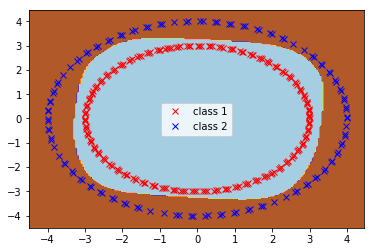

In [26]:
##visualizing the decision boundary

import matplotlib.pyplot as plt

df1 = train[train['class']==1]
df2 = train[train['class']==2]

x= np.arange(-4.5,4.5,0.05)
y = np.arange(-4.5,4.5,0.05)
xx,xy = np.meshgrid(x,y)
X = np.c_[xx.ravel(), xy.ravel()]
p = np.array(predict(X, m1))
p = p.reshape(xx.shape)
plt.plot(df1.X, df1.Y, 'rx', label = 'class 1')
plt.plot(df2.X, df2.Y, 'bx', label = 'class 2')
plt.contourf(xx, xy, p, cmap=plt.cm.Paired, alpha=1)
plt.legend()
plt.show()